# Email Spam Detection

In this project I created email spam detection model using various machine learning algorithms.

The data set has two columns one is the subject of the mail and the other is the label called spam, which specifies if the given document is ham or spam. The value 1 indicates it's a spam and 0 for ham.

This is typically a classification problem and since it has only labels either 0 or 1 it falls under the binary classification.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

#for data processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer


#model score and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

## EDA

In [2]:
data = pd.read_csv('emails.csv')
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [3]:
data.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

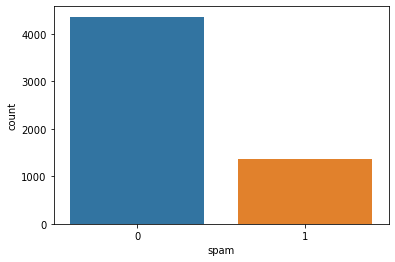

In [4]:
sns.countplot(x='spam',data=data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
data.isna().sum()

text    0
spam    0
dtype: int64

In [7]:
data.isnull().sum()

text    0
spam    0
dtype: int64

## Train & test split data

In [8]:
X = data.text
y = data.spam

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [51]:
print(X_train.shape,X_test.shape)

(4009,) (1719,)


## 1) Tokenizer & Vectorizing data

In [52]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
print(f"Total vocabulary size in the train data is {len(vectorizer.vocabulary_)}")

Total vocabulary size in the train data is 31850


In [53]:
vectorizer.vocabulary_

{'subject': 27646,
 'volatility': 30520,
 'curves': 9012,
 'linked': 17697,
 'from': 13132,
 'reuters': 24770,
 'hi': 14558,
 'tanya': 28231,
 'attached': 4832,
 'are': 4537,
 'the': 28573,
 'live': 17766,
 'please': 22294,
 'don': 10399,
 're': 23859,
 'establish': 11741,
 'links': 17699,
 'as': 4658,
 'think': 28654,
 'that': 28566,
 'your': 31624,
 'telerate': 28395,
 'connection': 8235,
 'works': 31282,
 'in': 15339,
 'same': 25431,
 'way': 30764,
 'ours': 21159,
 'london': 17890,
 'will': 31076,
 'get': 13532,
 'back': 5096,
 'to': 28876,
 'you': 31612,
 'on': 20836,
 'cleaning': 7518,
 'up': 29897,
 'historical': 14641,
 'forward': 12967,
 'curve': 9011,
 'database': 9212,
 'complete': 7973,
 'each': 10759,
 'metal': 18987,
 'we': 30780,
 'can': 6649,
 'talk': 28189,
 'at': 4794,
 'pm': 22351,
 'agreed': 3684,
 'regards': 24198,
 'anjam': 4238,
 'fast': 12334,
 'dial': 9870,
 'is': 16102,
 '830': 2668,
 '5383': 1928,
 'or': 20993,
 '35383': 1370,
 'organizational': 21041,
 'annou

In [54]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '00000000',
 '0000000000',
 '000000000003619',
 '000000000003991',
 '000000000003997',
 '000000000005168',
 '000000000005409',
 '000000000005411',
 '000000000005820',
 '000000000006238',
 '000000000006452',
 '000000000007494',
 '000000000007876',
 '000000000011185',
 '000000000012734',
 '000000000012736',
 '000000000012738',
 '000000000012741',
 '000000000012987',
 '000000000013085',
 '000000000013287',
 '000000000015384',
 '000000000024099',
 '000000000025307',
 '000000000025312',
 '0000102789',
 '0000104281',
 '0000104282',
 '0000104486',
 '0000104631',
 '0000104730',
 '0000104776',
 '0000104778',
 '0000107043',
 '0000108729',
 '000066',
 '0001',
 '000166',
 '0002',
 '000202',
 '0003',
 '0004',
 '0009249480',
 '0009249481',
 '0009249504',
 '0009249505',
 '0009249506',
 '001',
 '0011',
 '0015',
 '00193',
 '002',
 '00225',
 '00235424',
 '002813',
 '003',
 '0031',
 '00343938',
 '004',
 '0044',
 '00453',
 '005',
 '0052',
 '0057',
 '006',
 '0061',
 '006

In [55]:
X_train_token = vectorizer.transform(X_train)
print(X_train_token[0].shape)

(1, 31850)


In [56]:
X_test_token = vectorizer.transform(X_test)
print(X_test_token[0].shape)

(1, 31850)


In [57]:
print(X_train_token[0])

  (0, 1370)	1
  (0, 1928)	1
  (0, 2668)	2
  (0, 3684)	1
  (0, 4238)	1
  (0, 4537)	1
  (0, 4658)	4
  (0, 4794)	1
  (0, 4832)	1
  (0, 5096)	1
  (0, 6649)	1
  (0, 7518)	1
  (0, 7973)	1
  (0, 8235)	1
  (0, 9011)	1
  (0, 9012)	2
  (0, 9212)	1
  (0, 9870)	1
  (0, 10399)	2
  (0, 10759)	1
  (0, 11741)	1
  (0, 12334)	1
  (0, 12967)	1
  (0, 13132)	1
  (0, 13532)	1
  :	:
  (0, 20836)	1
  (0, 20993)	1
  (0, 21159)	1
  (0, 22294)	1
  (0, 22351)	1
  (0, 23859)	1
  (0, 24198)	1
  (0, 24770)	2
  (0, 25431)	1
  (0, 27646)	1
  (0, 28189)	1
  (0, 28231)	1
  (0, 28395)	1
  (0, 28566)	1
  (0, 28573)	4
  (0, 28654)	2
  (0, 28876)	1
  (0, 29897)	1
  (0, 30520)	2
  (0, 30764)	1
  (0, 30780)	2
  (0, 31076)	1
  (0, 31282)	1
  (0, 31612)	1
  (0, 31624)	1


In [58]:
print(X_test_token[0])

  (0, 0)	1
  (0, 125)	1
  (0, 189)	1
  (0, 264)	1
  (0, 333)	2
  (0, 758)	1
  (0, 1065)	1
  (0, 1090)	5
  (0, 1120)	1
  (0, 1168)	1
  (0, 1674)	1
  (0, 1800)	2
  (0, 1872)	2
  (0, 1905)	1
  (0, 2035)	1
  (0, 2388)	1
  (0, 2503)	1
  (0, 2717)	1
  (0, 2792)	2
  (0, 3104)	1
  (0, 3191)	2
  (0, 3524)	1
  (0, 3839)	2
  (0, 3965)	1
  (0, 4015)	2
  :	:
  (0, 28573)	12
  (0, 28876)	6
  (0, 28984)	3
  (0, 29763)	1
  (0, 29897)	1
  (0, 29981)	1
  (0, 30044)	1
  (0, 30294)	1
  (0, 30343)	1
  (0, 30384)	1
  (0, 30387)	1
  (0, 30721)	1
  (0, 30746)	2
  (0, 30780)	1
  (0, 30854)	1
  (0, 30961)	1
  (0, 30985)	1
  (0, 30990)	1
  (0, 31076)	9
  (0, 31168)	1
  (0, 31174)	1
  (0, 31318)	1
  (0, 31367)	1
  (0, 31612)	3
  (0, 31624)	1


## SVC Classifier

In [59]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc = SVC(gamma = 0.1 , C = 1 , kernel = kernel)
    svc.fit(X_train_token,y_train)
    svc_scores.append(round(svc.score(X_test_token,y_test),2))
print("SVM Max Score is {} with {} ".format(max(svc_scores), kernels[svc_scores.index(max(svc_scores))] ))
kernel = kernels[svc_scores.index(max(svc_scores))]

SVM Max Score is 0.98 with linear 


In [60]:
svm1 = SVC(gamma = 0.1 , C = 1 , kernel = kernel )
svm1.fit(X_train_token,y_train)
svm1_score = svm1.score(X_test_token,y_test)
y_pred = svm1.predict(X_test_token)
csv_cm = confusion_matrix(y_test,y_pred)

In [61]:
accuracy_score(y_test,y_pred)

0.9825479930191972

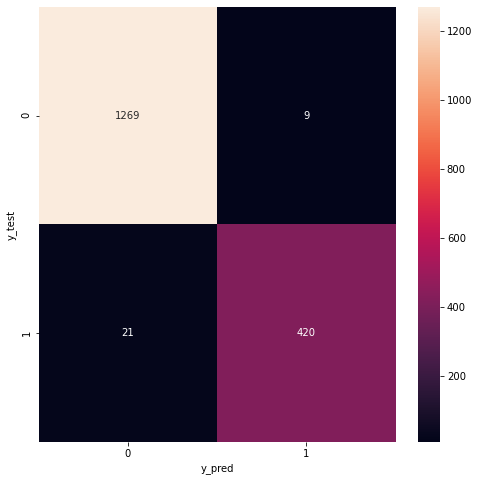

In [62]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(csv_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

## KNN Classification

In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train_token,y_train)
knn.score(X_test_token,y_test)

0.893542757417103

In [64]:
knn_cm = confusion_matrix(y_test,y_pred)

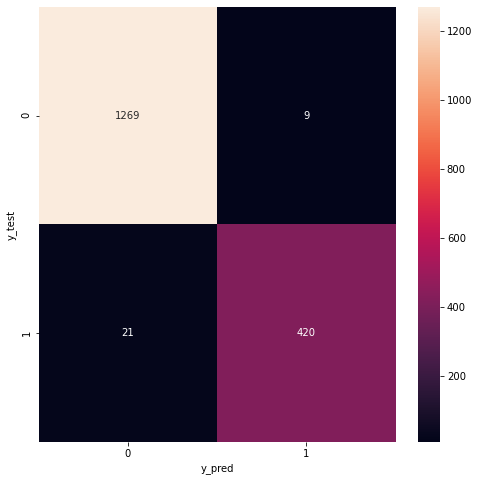

In [65]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(knn_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

## Multinomial NaiveBayes Classification

In [66]:
nb = MultinomialNB()
nb.fit(X_train_token,y_train)
y_pred = nb.predict(X_test_token)
accuracy_score(y_test,y_pred)

0.9872018615474113

In [67]:
nb_cm = confusion_matrix(y_test,y_pred)

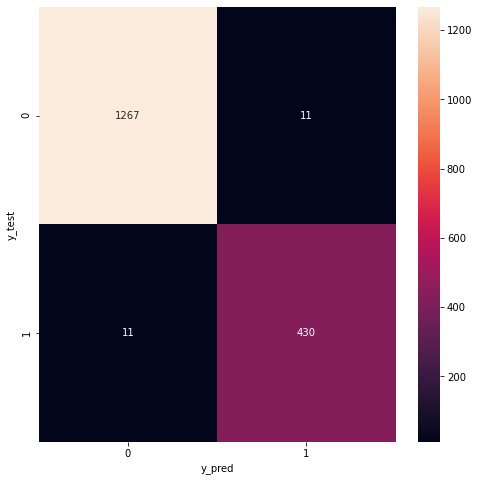

In [68]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(nb_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

## 2) TF-IDF vectorizer

In [69]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_token  = vectorizer.transform(X_train)
X_test_token = vectorizer.transform(X_test)

## SVC Classification

In [70]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc = SVC(gamma = 0.1 , C = 1 , kernel = kernel)
    svc.fit(X_train_token,y_train)
    svc_scores.append(round(svc.score(X_test_token,y_test),2))
print("SVM Max Score is {} with {} ".format(max(svc_scores), kernels[svc_scores.index(max(svc_scores))] ))
kernel = kernels[svc_scores.index(max(svc_scores))]

SVM Max Score is 0.99 with linear 


In [71]:
svm1 = SVC(gamma = 0.1 , C = 1 , kernel = kernel )
svm1.fit(X_train_token,y_train)
svm1_score = svm1.score(X_test_token,y_test)
print(svm1_score)
y_pred = svm1.predict(X_test_token)
csv_cm = confusion_matrix(y_test,y_pred)

0.9918557300756253


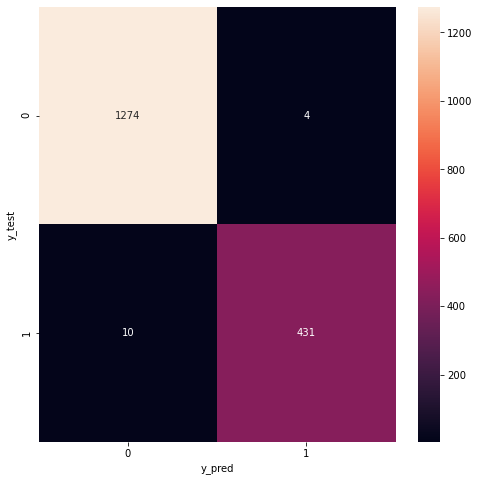

In [72]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(csv_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

## KNN Calassification

In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train_token,y_train)
knn.score(X_test_token,y_test)

0.9738219895287958

In [74]:
knn_cm = confusion_matrix(y_test,y_pred)

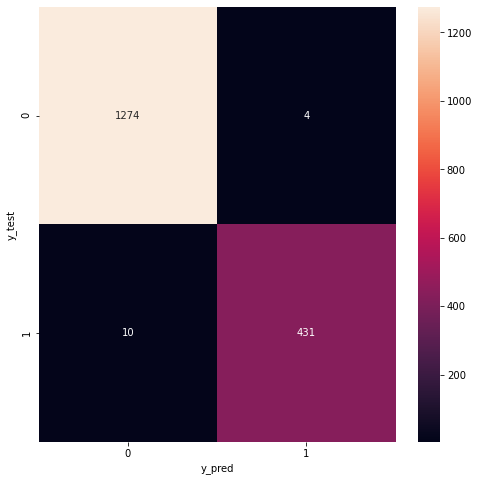

In [75]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(knn_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

## Mulinomial NaiveBayes Classification

In [76]:
nb = MultinomialNB()
nb.fit(X_train_token,y_train)
y_pred = nb.predict(X_test_token)
accuracy_score(y_test,y_pred)

0.8388598022105875

In [77]:
nb_cm = confusion_matrix(y_test,y_pred)

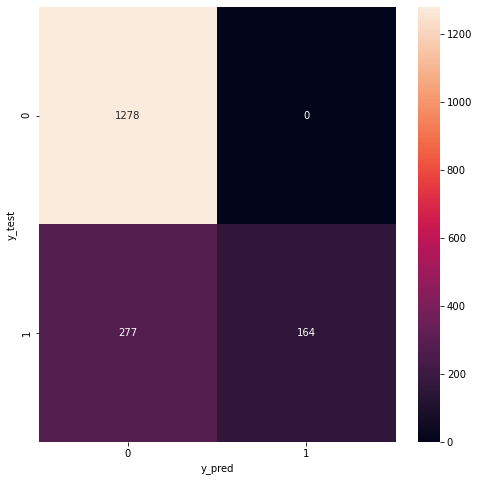

In [78]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(nb_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

## 3) TF - IDF with n-gram

In [79]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)
X_train_token = vectorizer.transform(X_train)
X_test_token = vectorizer.transform(X_test)

## SVM Classification

In [80]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc = SVC(gamma = 0.1 , C = 1 , kernel = kernel)
    svc.fit(X_train_token,y_train)
    svc_scores.append(round(svc.score(X_test_token,y_test),2))
print("SVM Max Score is {} with {} ".format(max(svc_scores), kernels[svc_scores.index(max(svc_scores))] ))
kernel = kernels[svc_scores.index(max(svc_scores))]

SVM Max Score is 0.99 with linear 


In [81]:
svm1 = SVC(gamma = 0.1 , C = 1 , kernel = kernel )
svm1.fit(X_train_token,y_train)
svm1_score = svm1.score(X_test_token,y_test)
print(svm1_score)
y_pred = svm1.predict(X_test_token)
csv_cm = confusion_matrix(y_test,y_pred)

0.9918557300756253


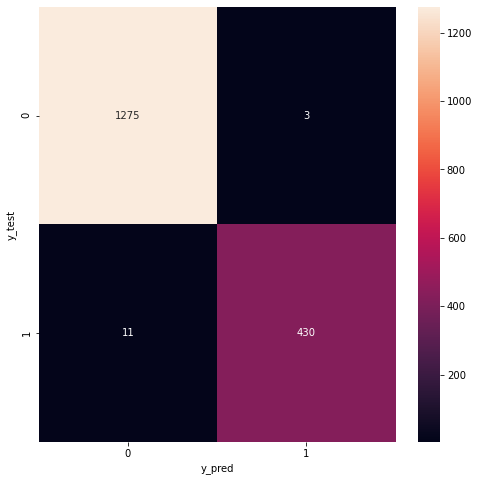

In [82]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(csv_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

## KNN Classification

In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train_token,y_train)
knn.score(X_test_token,y_test)

0.9639325189063409

In [84]:
knn_cm = confusion_matrix(y_test,y_pred)

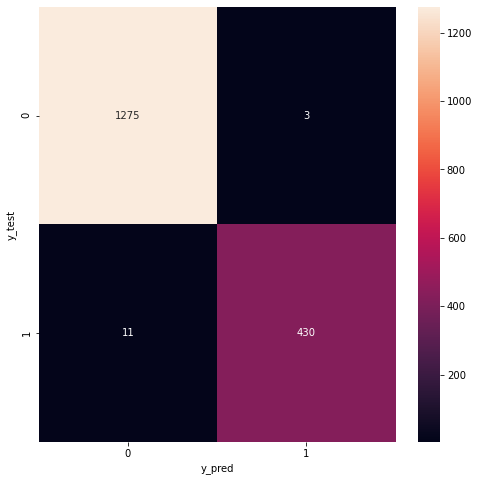

In [85]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(knn_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

## Multinomial NaiveBayes Classification

In [86]:
nb = MultinomialNB()
nb.fit(X_train_token,y_train)
y_pred = nb.predict(X_test_token)
accuracy_score(y_test,y_pred)

0.8248981966259453

In [87]:
nb_cm = confusion_matrix(y_test,y_pred)

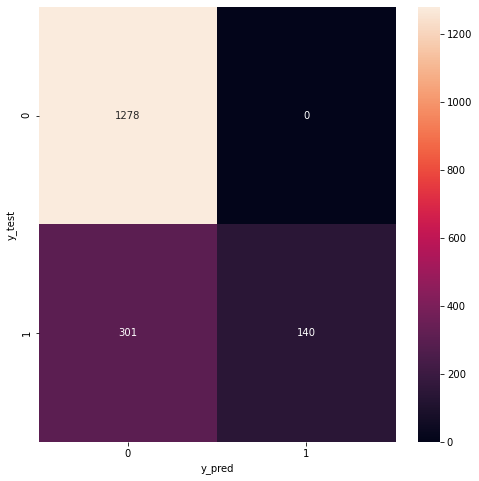

In [88]:
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(nb_cm,annot = True,linewidths=0,fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()